# **Gradiente descendente**

El descenso de gradiente es un algoritmo de optimización iterativo de primer orden para encontrar un mínimo local de una función diferenciable. Para encontrar un mínimo local de una función usando el descenso de gradiente, tomamos pasos proporcionales al negativo del gradiente (o gradiente aproximado) de la función en el punto actual. Pero si en cambio damos pasos proporcionales al positivo del gradiente, nos acercamos a un máximo local de esa función; el procedimiento se conoce entonces como ascenso en pendiente .

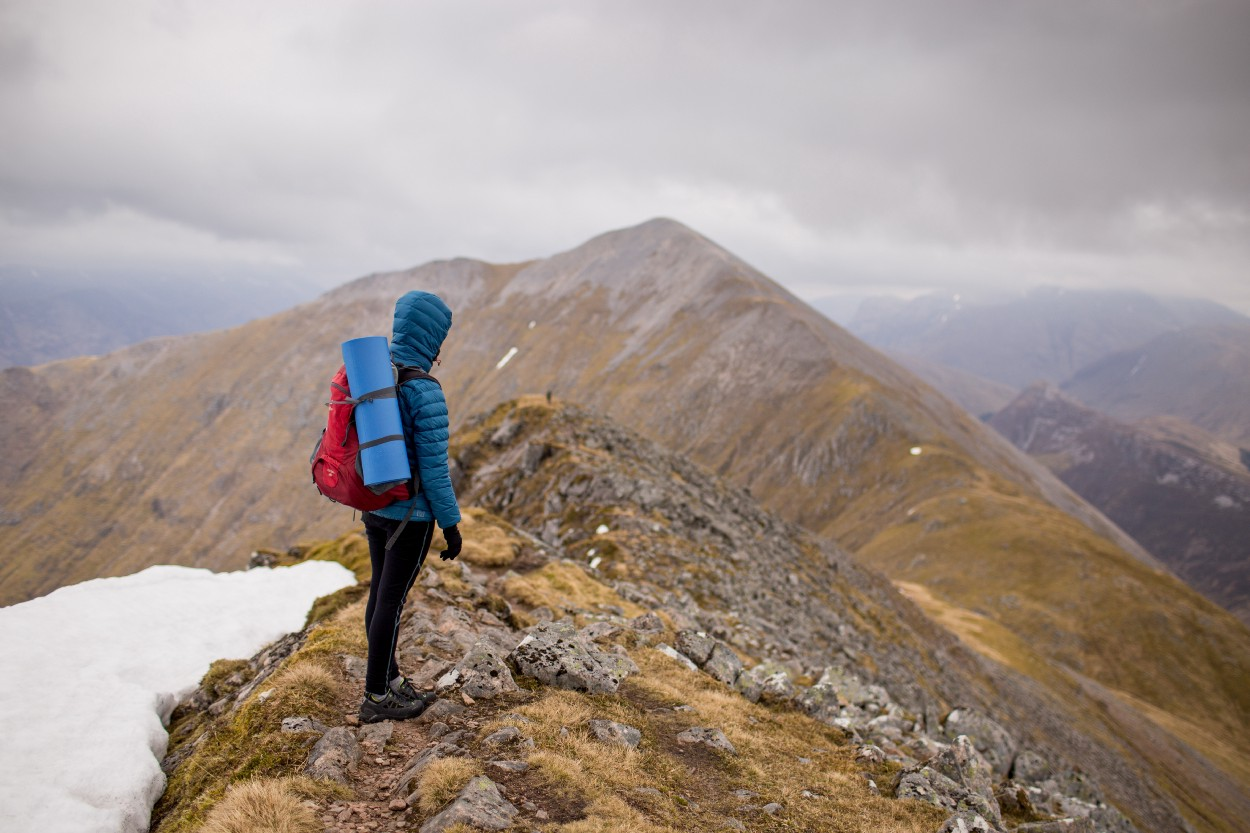

###  _Sergio Cañón Laiz_
### CUNEF
### 13/11/2020

### Loading of Data

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'invalid': 'ignore', 'over': 'warn', 'under': 'ignore'}

In [118]:
df=pd.read_csv("4_1_data.csv",header=0)
"""
La X es el score-1 y score-2
la Y es si han aprobado o no "label"
"""
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [119]:
df.head()

,score-1,score-2,label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [120]:
df.describe()

,score-1,score-2,label
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


### Plotting of Data

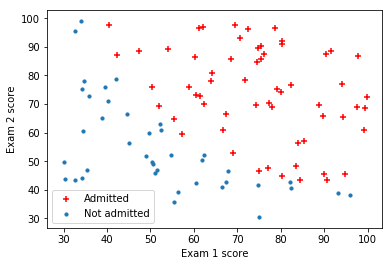

In [121]:
pos , neg = (y==1).reshape(100,1) , (y==0).reshape(100,1)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+")
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],marker="o",s=10)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(["Admitted","Not admitted"],loc=0)

### Sigmoid function

Una función sigmoidea es una delimitada , diferenciable función real, que se define para todos los valores de entrada real y tiene un derivado no negativo en cada punto [1] y exactamente un punto de inflexión. Una "función" sigmoidea y una "curva" sigmoidea se refieren al mismo objeto.

$ g(z) = \frac{1}{(1+e^{-z})}$

In [122]:
def sigmoid(z):
    """
    devuelve el valor sigma de z
    """
    
    return 1/ (1 + np.exp(-z))

In [123]:
# testing the sigmoid function
sigmoid(0)

0.5

### Compute the Cost Function and Gradient

Las funciones de coste nos dicen "qué tan bueno" es nuestro modelo para hacer predicciones para un conjunto dado de parámetros. La función de coste tiene su propia curva y sus propios gradientes. La pendiente de esta curva nos dice cómo actualizar nuestros parámetros para hacer que el modelo sea más preciso.

$J(\Theta) = \frac{1}{m} \sum_{i=1}^{m} [ -y^{(i)}log(h_{\Theta}(x^{(i)})) - (1 - y^{(i)})log(1 - (h_{\Theta}(x^{(i)}))]$

$ \frac{\partial J(\Theta)}{\partial \Theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\Theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$

In [124]:
def costFunction(theta, X, y):
    """
1.- Toma una  matriz numpy theta, x e y, y devuelve la función de costo de regresión
2.- longuitud del dataset = total de observaciones
3.- valor sigma para el producto escalar de dos matrices X y theta
4.- error de cada prediccion con sigma y el valor Y real aporbado o no
5.- el coste es la suma de esos errores divido entre el número de observaciones
6.- se transpone X y se hace el producto escalar  de X y la diferencia de la predicción y el valor de Y real 
7.- devolvemos el gradiente y el coste
"""
    
    m=len(y)
    
    predictions = sigmoid(np.dot(X,theta))
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))

    cost = 1/m * sum(error)
    
    grad = 1/m * np.dot(X.transpose(),(predictions - y))
    
    return cost[0] , grad

### Feature scaling

In [125]:
def featureNormalization(X):
    """
   Se cogen los valores de X y se normalizan,la desviación media y estándar de cada variable
    """
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm = (X - mean)/std
    
    return X_norm , mean , std

In [126]:
m , n = X.shape[0], X.shape[1] 
X, X_mean, X_std = featureNormalization(X)
X= np.append(np.ones((m,1)),X,axis=1)
y=y.reshape(m,1)
initial_theta = np.zeros((n+1,1))
cost, grad= costFunction(initial_theta,X,y)
print("Cost of initial theta is",cost)
print("Gradient at initial theta (zeros):",grad)

Cost of initial theta is 0.693147180559946
Gradient at initial theta (zeros): [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


### Gradient Descent

In [127]:
def gradientDescent(X,y,theta,alpha,num_iters):
    """
    1.- Se coge la matriz  X, Y y theta y va cambiando theta en función
    2.- del valor de alpha(aprendizaje)
    3.- creamos un conjunto vacio para ir añadiendo los valores de theta
    4.- Luego se devuelve theta y el histórico del coste de theta durante cada iteración
    """
    
    m=len(y)
    J_history =[]
    
    for i in range(num_iters):
        cost, grad = costFunction(theta,X,y)
        theta = theta - (alpha * grad)
        J_history.append(cost)
    
    return theta , J_history

In [128]:
  """
    Vamos probando el learning rate y el número de iteraciones
    """
theta , J_history = gradientDescent(X,y,initial_theta,1,400)
   
  

In [129]:
print("Theta optimized by gradient descent:",theta)
print("The cost of the optimized theta:",J_history[-1])

Theta optimized by gradient descent: [[1.65947664]
 [3.8670477 ]
 [3.60347302]]
The cost of the optimized theta: 0.2036004424915611


Ahora que tenemos una función de costo de trabajo, el siguiente paso es escribir una función que calcule el gradiente de los parámetros del modelo para descubrir cómo cambiar los parámetros para mejorar el resultado del modelo en los datos de entrenamiento. Recuerde que con el descenso de gradiente no solo cambiamos aleatoriamente los valores de los parámetros para ver qué funciona mejor. En cada iteración de entrenamiento, actualizamos los parámetros de una manera que está garantizada para moverlos en una dirección que reduce el error de entrenamiento (es decir, el "costo"). Podemos hacer esto porque la función de costo es diferenciable.

Minimice la función de costo $ J (\ theta) $ actualizando la siguiente ecuación y repita hasta la convergencia $ \ theta_j: = \ theta_j - \ alpha \ frac {\ partial J (\ theta)} {\ partial \ theta_j} $ (simultáneamente actualizar $ \ theta_j $ para todos los $ j $)

### Plotting of Cost Function
Para que el descenso del gradiente alcance el mínimo local, debemos establecer la tasa de aprendizaje en un valor apropiado, que no sea ni demasiado bajo ni demasiado alto. Esto es importante porque si los pasos que da son demasiado grandes, es posible que no alcance el mínimo local porque rebota hacia adelante y hacia atrás entre la función convexa del descenso del gradiente (vea la imagen a continuación). Si establecemos la tasa de aprendizaje en un valor muy pequeño, el descenso del gradiente eventualmente alcanzará el mínimo local, pero eso puede llevar un tiempo.
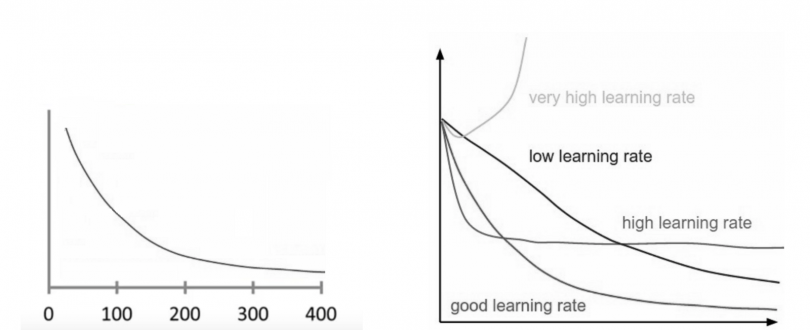

Text(0.5, 1.0, 'Cost function using Gradient Descent')

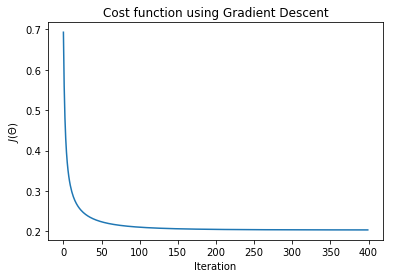

In [130]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

Cuando el descenso del gradiente ya no puede disminuir la función de costo y permanece más o menos en el mismo nivel, ha convergido.

Text(0.5, 1.0, 'Cost function using Gradient Descent')

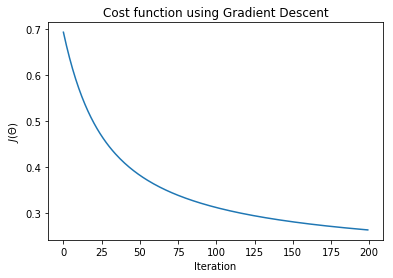

In [131]:
theta , J_history = gradientDescent(X,y,initial_theta,0.1,200)
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

### Plotting the decision boundary

Después de ejecutar el algoritmo y obtener los parámetros óptimos, queremos saber qué tan exitoso es nuestro modelo para predecir las clases de nuestros datos.

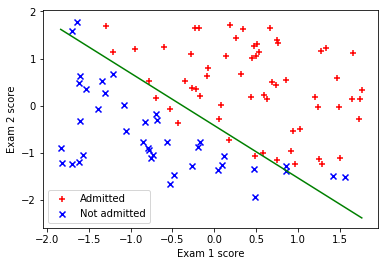

In [132]:
plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+",label="Admitted")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",marker="x",label="Not admitted")
x_value= np.array([np.min(X[:,1]),np.max(X[:,1])])
y_value=-(theta[0] +theta[1]*x_value)/theta[2]
plt.plot(x_value,y_value, "g")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)

### Prediction

In [133]:
def classifierPredict(theta,X):
    """
    cogemos al numpy de theta y de X y predecimos un 
    """
    predictions = X.dot(theta)
    
    return predictions>0

In [134]:
x_test = np.array([45,85])
x_test = (x_test - X_mean)/X_std
x_test = np.append(np.ones(1),x_test)
prob = sigmoid(x_test.dot(theta))
print("For a student with scores 45 and 85, we predict an admission probability of",prob[0])

For a student with scores 45 and 85, we predict an admission probability of 0.6002863462933967


### Accuracy on training set 

In [135]:
p=classifierPredict(theta,X)
print("Train Accuracy:", sum(p==y)[0],"%")

Train Accuracy: 90 %


### References

* http://sites.science.oregonstate.edu/math/home/programs/undergrad/CalculusQuestStudyGuides/vcalc/grad/grad.html
* https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f
* https://towardsdatascience.com/understanding-the-mathematics-behind-gradient-descent-dde5dc9be06e
* https://towardsdatascience.com/andrew-ngs-machine-learning-course-in-python-logistic-regression-c0ae25509feb
* https://towardsdatascience.com/implement-gradient-descent-in-python-9b93ed7108d1